In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"


import numpy as np

# Load pre-extracted features
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [3]:
print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Classes:", np.unique(y_train))

Training shape: (1615, 512)
Test shape: (404, 512)
Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize model
knn = KNeighborsClassifier()

# GridSearchCV
grid_search = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=1
)

In [5]:
# Train model with grid search
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/Caskroom/miniconda/base/envs/py310/lib/python3.10/site-packages/threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.8148606811145511


In [6]:
# Evaluate on test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8267326732673267
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        43
           1       0.93      0.93      0.93        28
           2       0.90      0.82      0.86        33
           3       0.93      0.62      0.74        21
           4       0.62      0.42      0.50        12
           5       0.78      0.81      0.79        26
           6       1.00      0.90      0.95        20
           7       0.97      0.85      0.90        33
           8       0.85      0.85      0.85        27
           9       0.72      0.90      0.80        20
          10       0.84      0.94      0.89        33
          11       0.78      0.78      0.78        27
          12       0.61      0.90      0.73        30
          13       0.76      0.66      0.70        29
          14       0.78      0.95      0.86        22

    accuracy                           0.83       404
   macro avg       0.83

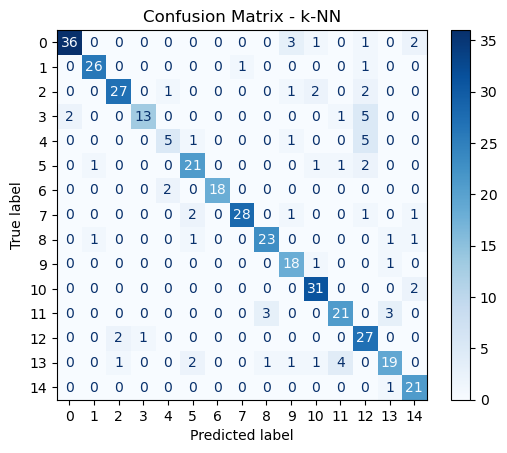

In [7]:
# Optional: Save the best model
import joblib
joblib.dump(best_knn, 'best_knn_model.pkl')

# Optional: Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - k-NN")
plt.show()